In [1]:
import os

# The path to the data folder, adjusted to target the Voting subfolder
data_folder_path = '../data/Voting'
output_folder_path = '../data/VotingProcessed'  # Path to save processed files

# Create the output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

# Loop through all files in the Voting folder
for file_name in os.listdir(data_folder_path):
    if file_name.endswith('.tab'):
        # Construct full paths to the input and output files
        input_file_path = os.path.join(data_folder_path, file_name)
        output_file_path = os.path.join(output_folder_path, f'cut_{file_name}')

        # Read the first 10,000 lines of the input file and write to the output file
        with open(input_file_path, 'r') as file_in, open(output_file_path, 'w') as file_out:
            for i in range(10000):  # Loop over the first 10000 lines
                line = file_in.readline()
                
                # If the file ends before reaching 10000 lines, break out of the loop
                if not line:
                    break
                
                file_out.write(line)

        print(f'Processed {file_name}')


Processed VM2--MA--2021-01-19-DEMOGRAPHIC.tab
Processed VM2--MA--2021-01-19-VOTEHISTORY.tab
Processed VM2--MA--2021-10-11-DEMOGRAPHIC.tab
Processed VM2--MA--2021-10-11-VOTEHISTORY.tab
Processed VM2--MA--2022-08-19-DEMOGRAPHIC.tab
Processed VM2--MA--2022-08-19-VOTEHISTORY.tab


In [4]:
import pandas as pd

# Load the first demographic file for preliminary EDA
file_path = '../data/VotingProcessed/cut_VM2--MA--2021-01-19-DEMOGRAPHIC.tab'

# Since the file is a .tab, we assume it's tab-delimited
demographic_df = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows of the dataframe
demographic_df.head()

C:\Users\dimak\AppData\Local\Temp\ipykernel_33476\682862631.py:7: DtypeWarning: Columns (24,25,28,48,53,54,57,106,115,178,293,314,382,389,395,397,398,440,443,454) have mixed types. Specify dtype option on import or set low_memory=False.
  demographic_df = pd.read_csv(file_path, delimiter='\t')


,SEQUENCE,LALVOTERID,Voters_Active,Voters_StateVoterID,Voters_CountyVoterID,VoterTelephones_LandlineAreaCode,VoterTelephones_Landline7Digit,VoterTelephones_LandlineFormatted,VoterTelephones_LandlineUnformatted,VoterTelephones_LandlineConfidenceCode,...,ElectionReturns_P18PrecinctTurnoutAllRegisteredVoters,ElectionReturns_P18PrecinctTurnoutDemocrats,ElectionReturns_P18PrecinctTurnoutRepublicans,FECDonors_AvgDonation,FECDonors_AvgDonation_Range,FECDonors_LastDonationDate,FECDonors_NumberOfDonations,FECDonors_PrimaryRecipientOfContributions,FECDonors_TotalDonationsAmount,FECDonors_TotalDonationsAmt_Range
0,1,LALMA162002848,I,02TJH1046001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,LALMA528324496,I,02FLS1497000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,LALMA573296089,I,03RKN1001000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,LALMA161150467,I,06MKE0488004,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,LALMA442113039,I,12SLY1788001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Demographic Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 646 entries, SEQUENCE to FECDonors_TotalDonationsAmt_Range
dtypes: float64(279), int64(48), object(319)
memory usage: 49.3+ MB
None

Vote History Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 984 entries, LALVOTERID to BallotReturnDate_Primary_2010_09_14
dtypes: float64(633), int64(1), object(350)
memory usage: 75.1+ MB
None

Demographic Data Description:
           SEQUENCE      LALVOTERID Voters_Active Voters_StateVoterID  \
count   9999.000000            9999          9999                9999   
unique          NaN            9999             2                9999   
top             NaN  LALMA162002848             A        02TJH1046001   
freq            NaN               1          9150                   1   
mean    5000.000000             NaN           NaN                 NaN   
std     2886.607005             NaN           NaN 

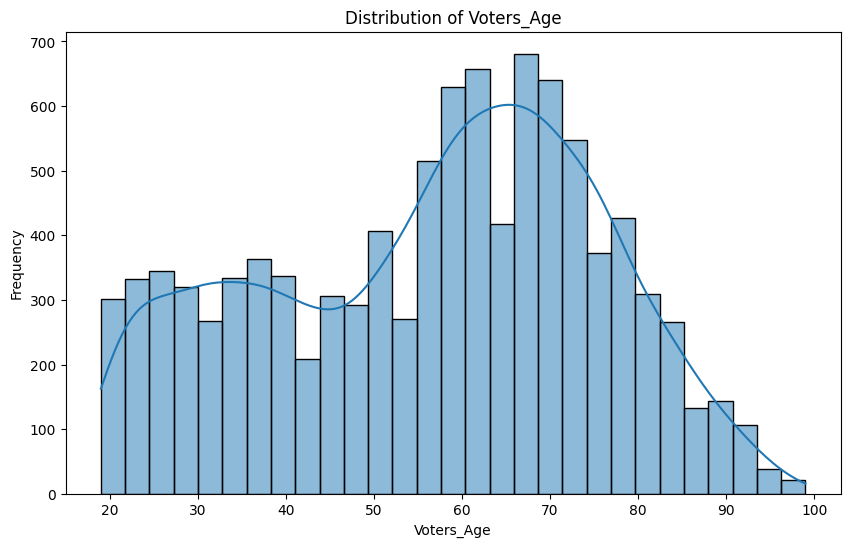

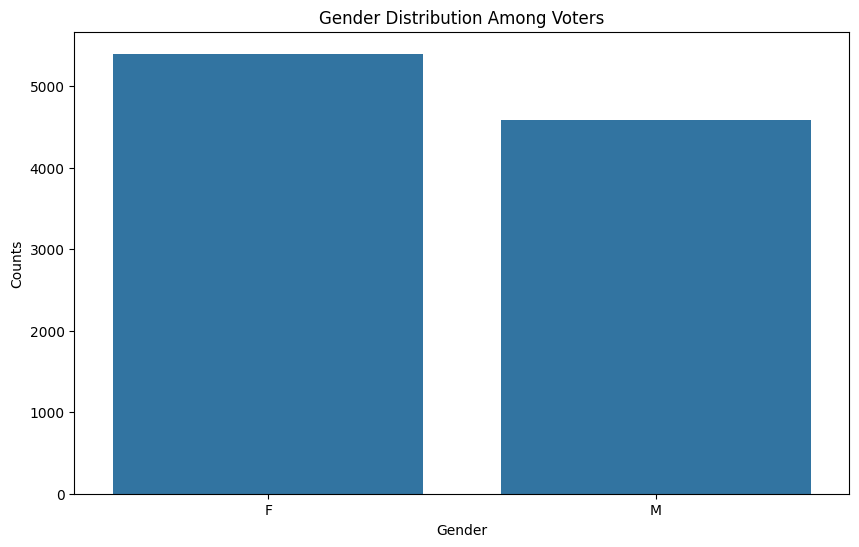

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
demographic_data_path = '../data/VotingProcessed/cut_VM2--MA--2021-01-19-DEMOGRAPHIC.tab'  
vote_history_data_path = '../data/VotingProcessed/cut_VM2--MA--2021-01-19-VOTEHISTORY.tab'  

demographic_data = pd.read_csv(demographic_data_path, sep='\t', low_memory=False)
vote_history_data = pd.read_csv(vote_history_data_path, sep='\t', low_memory=False)

# Basic Information
print("Demographic Data Info:")
print(demographic_data.info())
print("\nVote History Data Info:")
print(vote_history_data.info())

# Summary Statistics
print("\nDemographic Data Description:")
print(demographic_data.describe(include='all'))
print("\nVote History Data Description:")
print(vote_history_data.describe(include='all'))

# Data Cleaning 
demographic_data_clean = demographic_data.dropna(axis=1, thresh=int(0.5*len(demographic_data)))
vote_history_data_clean = vote_history_data.dropna(axis=1, thresh=int(0.5*len(vote_history_data)))

# Using identified columns for analysis
numeric_column_name = 'Voters_Age'
categorical_column_name = 'Voters_Gender'

# Visualizations
# Histogram of a selected numeric column from demographic data
plt.figure(figsize=(10, 6))
sns.histplot(demographic_data_clean[numeric_column_name].dropna(), kde=True)
plt.title(f"Distribution of {numeric_column_name}")
plt.xlabel(numeric_column_name)
plt.ylabel("Frequency")
plt.show()

# Bar plot of a selected categorical column from demographic data
plt.figure(figsize=(10, 6))
sns.countplot(x='Voters_Gender', data=demographic_data_clean)
plt.title("Gender Distribution Among Voters")
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.show()
